In [1]:
results_path = '../../Downloads/results_4_1/results/'

In [78]:
import numpy as np
import pickle
import os
import math
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [89]:
def get_results(pop_size,update_time,case,phrase):
    
    files = os.listdir('{}'.format(results_path))
    
    steps = []

    #check population and pop_size,update_time
    files = [f for f in files if '.DS' not in f and pop_size in f and phrase in f and 'update_days_{}'.format(update_time) in f and case in f and '2015' not in f]
    #files = files[:50]
    #print(len(files))
    #print(files)
    seen = 0 
    regrets = {}
    actions = {}
    for ff in files:
        #sim = int(ff.split('sim_')[1].strip('_continuous_pretreatment_base_coef_scale_hybrid.pkl'))
        #try:
        with open('{}{}'.format(results_path,ff),'rb') as f:
            d = pickle.load(f)
            #return d
            #print(d.keys())
            if len(d)>0:
            #if int(sim)<60:
                #print(len([k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]))
                steps = steps+[k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]
                for k,v in d['actions'].items():
                    if k not in actions:
                        actions[k]=v
                    actions[k].extend(v)
            seen = seen+1
           # print(ff)
    print(seen)
    return steps,regrets,actions

In [127]:
def get_results(pop_size,update_time,case,phrase):
    
    files = os.listdir('{}'.format(results_path))
    
    steps = []

    #check population and pop_size,update_time
    files = [f for f in files if '.DS' not in f and pop_size in f and phrase in f and 'update_days_{}'.format(update_time) in f and case in f and '2015' not in f]
    #files = files[:50]
    #print(len(files))
    #print(files)
    seen = 0 
    regrets = {}
    actions = {}
    mus = {}
    for ff in files:
        #sim = int(ff.split('sim_')[1].strip('_continuous_pretreatment_base_coef_scale_hybrid.pkl'))
        #try:
        with open('{}{}'.format(results_path,ff),'rb') as f:
            d = pickle.load(f)
            return d
            print(d.keys())
            if len(d)>0:
            #if int(sim)<60:
                #print(len([k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]))
                steps = steps+[k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]
                for k,v in d['actions'].items():
                    if k not in actions:
                        actions[k]=v
                    actions[k].extend(v)
            seen = seen+1
           # print(ff)
    print(seen)
    return steps,regrets,actions

In [128]:
peek =  get_results('weighted_poolednewbigtest',1,'case_one','six_weeks_only_dc')

In [140]:
peekbaseline = get_results('personalized',7,'case_one','six_weeks_only_pplus')

In [147]:
peekbaseline['history']['9-2015-09-06 23:30:00']

KeyError: 'mu2'

In [152]:
for i in range(50):
    print(peek['history']['{}-2015-09-05 23:30:00'.format(i)]['mu2'])
    print(peek['history']['{}-2015-08-04 23:30:00'.format(i)]['mu2'])

[-0.05747876  0.20270482  0.12579619  0.03000741  0.23417164]
[ 0.03315671 -0.06254752  0.28715049 -0.04700392  0.4981577 ]
[-0.05747751  0.20270482  0.12579619  0.03000741  0.23417164]
[ 0.03315643 -0.06254752  0.28715049 -0.04700392  0.4981577 ]
[-0.057475    0.20270482  0.12579619  0.03000741  0.23417164]
[ 0.03315655 -0.06254752  0.28715049 -0.04700392  0.4981577 ]
[-0.05747788  0.20270482  0.12579619  0.03000741  0.23417164]
[ 0.03315653 -0.06254752  0.28715049 -0.04700392  0.4981577 ]
[-0.05747766  0.20270482  0.12579619  0.03000741  0.23417164]
[ 0.03315725 -0.06254752  0.28715049 -0.04700392  0.4981577 ]
[-0.05747554  0.20270482  0.12579619  0.03000741  0.23417164]
[ 0.03315667 -0.06254752  0.28715049 -0.04700392  0.4981577 ]
[-0.05747663  0.20270482  0.12579619  0.03000741  0.23417164]
[ 0.033157   -0.06254752  0.28715049 -0.04700392  0.4981577 ]
[-0.05747573  0.20270482  0.12579619  0.03000741  0.23417164]
[ 0.03315672 -0.06254752  0.28715049 -0.04700392  0.4981577 ]
[-0.0574

KeyError: '32-2015-09-05 23:30:00'

In [134]:
sorted(peek['history'].keys())[-1]

'9-2015-09-06 23:30:00'

In [124]:
b ,r,a= get_results('weighted_poolednewbigtest',1,'case_one','six_weeks_only_dc')

dict_keys(['gids', 'regrets', 'actions', 'history'])
dict_keys(['gids', 'regrets', 'actions', 'history'])
dict_keys(['gids', 'regrets', 'actions', 'history'])
dict_keys(['gids', 'regrets', 'actions', 'history'])
4


In [125]:
np.array(b).mean()

5.107660205174633

In [63]:
np.array(b).mean()

5.1008317866481905

In [80]:
b,r,apersonalized = get_results('personalized',7,'case_one','six_weeks_only_pplus')

51


In [65]:
np.array(b).mean()

5.107622371164358

In [109]:
b,r,abatch = get_results('batch_baseline',7,'case_one','check')

51


In [110]:
np.array(b).mean()

5.13937531871266

In [68]:
def get_to_plot_actions(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(sum(actions[k])/len(actions[k]))
    return to_plot

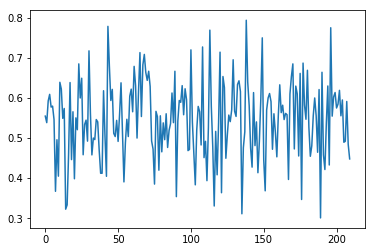

In [126]:
to_plot = get_to_plot_actions(a)
plt.plot(to_plot)

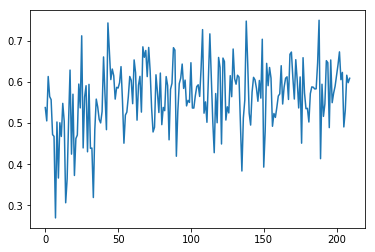

In [82]:
to_plot = get_to_plot_actions(apersonalized)
plt.plot(to_plot)

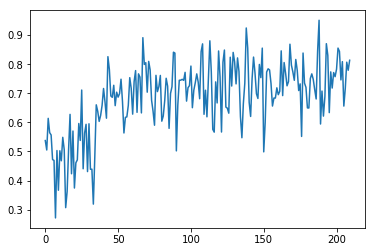

In [111]:
to_plot = get_to_plot_actions(abatch)
plt.plot(to_plot)